In [7]:
#Load data
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import HTML

path=""

train=pd.read_csv(path + "train.csv")
print (train)

test=pd.read_csv(path + "test.csv")
print (test)

y=train["y"].values
y_test=test["y"].values

train.drop("y",inplace=True, axis=1)
test.drop("y",inplace=True, axis=1)

X=train.values
X_test=test.values

print ("train data shapes ", X.shape, y.shape)
print ("test data shapes ", X_test.shape, y_test.shape)



            y      x0      x1      x2      x3      x4      x5      x6      x7  \
0     11.6948  0.0237  0.0445  0.4061  0.8424  0.4214  0.6728  0.8133  0.0923   
1      9.8253  0.4341  0.6407  0.2565  0.2035  0.1256  0.4701  0.9650  0.1066   
2     23.3586  0.1765  0.8790  0.6804  0.8298  0.0002  0.8823  0.6411  0.6149   
3     13.5047  0.8928  0.3574  0.1590  0.6387  0.9506  0.1529  0.3225  0.0040   
4     17.3522  0.8197  0.6020  0.3762  0.9833  0.4994  0.5512  0.0219  0.2650   
5     19.3476  0.9363  0.1676  0.5298  0.7799  0.0563  0.4845  0.6672  0.8950   
6     14.9536  0.3711  0.2059  0.7562  0.6672  0.7035  0.0948  0.6964  0.6683   
7     15.9923  0.9119  0.4102  0.5619  0.4864  0.1560  0.2987  0.0668  0.9284   
8     13.4537  0.7834  0.3045  0.0486  0.8205  0.2590  0.5412  0.0025  0.7891   
9      9.4677  0.0049  0.8610  0.2372  0.2630  0.3625  0.3093  0.3734  0.5695   
10    17.7552  0.7772  0.5735  0.4634  0.3603  0.6493  0.2141  0.6861  0.5543   
11    17.7484  0.9776  0.190

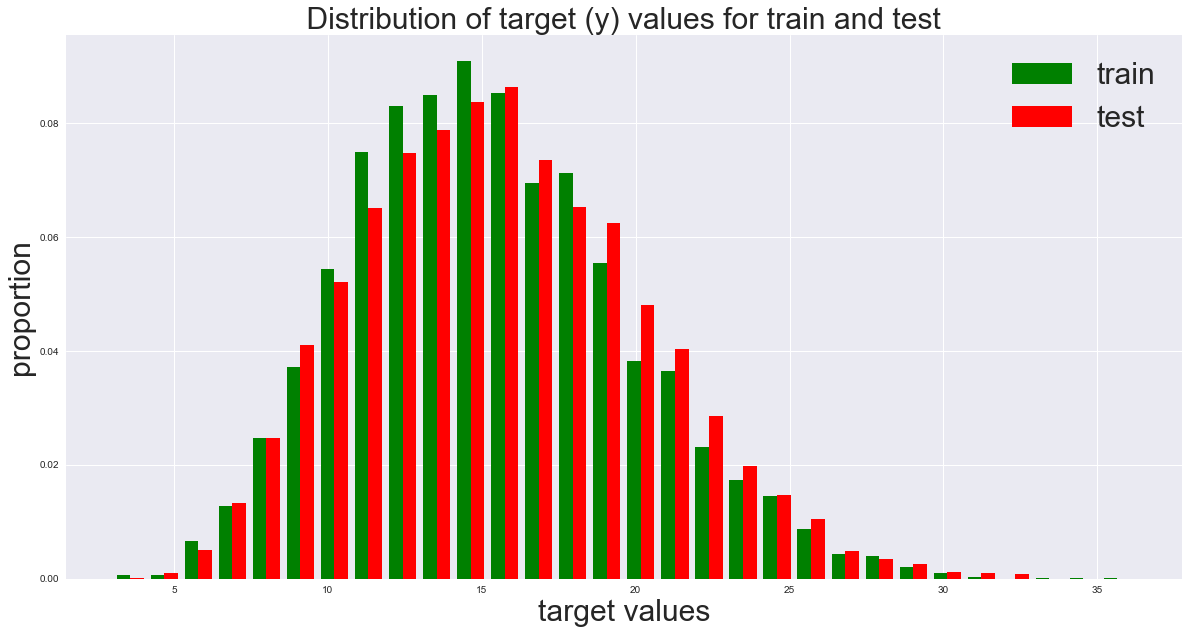

 mean of train  15.318999259851973
 mean of test  15.619698139999999


In [8]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]

plt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("proportion", fontsize=30);
plt.xlabel("target values", fontsize=30);
plt.title(" Distribution of target (y) values for train and test ", fontsize=30)
plt.legend( prop={'size': 30})
plt.show()


print (" mean of train ", np.mean(y))
print (" mean of test ", np.mean(y_test))

====================== Start of Level 0 ======================
Input Dimensionality 10 at Level 0 
1 models included in Level 0 
Fold 1/4 , model 0 , rmse===0.586376 
=========== end of fold 1 in level 0 ===========
Fold 2/4 , model 0 , rmse===0.636539 
=========== end of fold 2 in level 0 ===========
Fold 3/4 , model 0 , rmse===0.599659 
=========== end of fold 3 in level 0 ===========
Fold 4/4 , model 0 , rmse===0.615107 
=========== end of fold 4 in level 0 ===========
Output dimensionality of level 0 is 1 
====================== End of Level 0 ======================
 level 0 lasted 0.011966 seconds 
====================== Start of Level 1 ======================
Input Dimensionality 1 at Level 1 
1 models included in Level 1 
Fold 1/4 , model 0 , rmse===0.579685 
=========== end of fold 1 in level 1 ===========
Fold 2/4 , model 0 , rmse===0.641933 
=========== end of fold 2 in level 1 ===========
Fold 3/4 , model 0 , rmse===0.587644 
=========== end of fold 3 in level 1 ===========


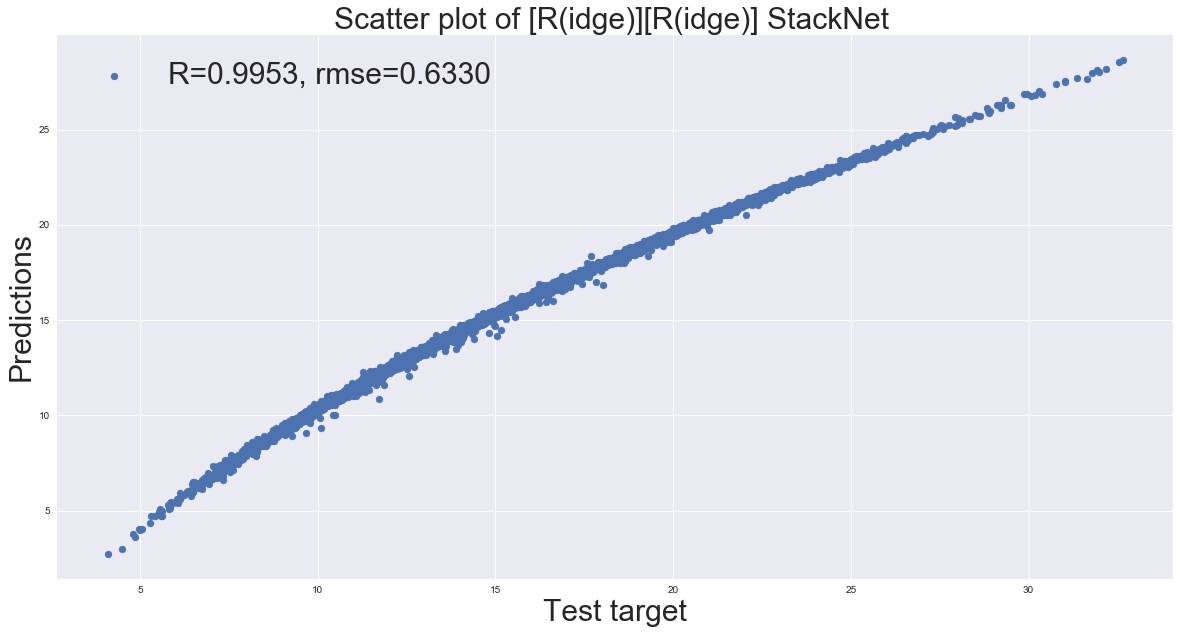

In [10]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
all_preds=[]
all_names=[]
#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=1

models=[
    #1ST level #
    
    [Ridge(alpha=0.1, normalize=True, random_state=1234)],
    
        #2ND level # 

        [Ridge(alpha=0.1, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds=model.predict(X_test)

print ("rmse on test is %f " %(np.sqrt(mean_squared_error(y_test,preds))))
print ("correlation on test is %f " %(pearsonr(y_test.reshape(-1,1),preds)[0]))


plt.scatter(y_test.reshape(-1,1), preds,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds)[0],np.sqrt(mean_squared_error(y_test,preds)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30);
plt.xlabel("Test target", fontsize=30);
plt.title("Scatter plot of [R(idge)][R(idge)] StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds)))
all_names.append("[R(idge)][R(idge)]")

plt.legend( loc = 'upper left', prop={'size': 30})
plt.plot(figsize=(1000,100))
plt.show()




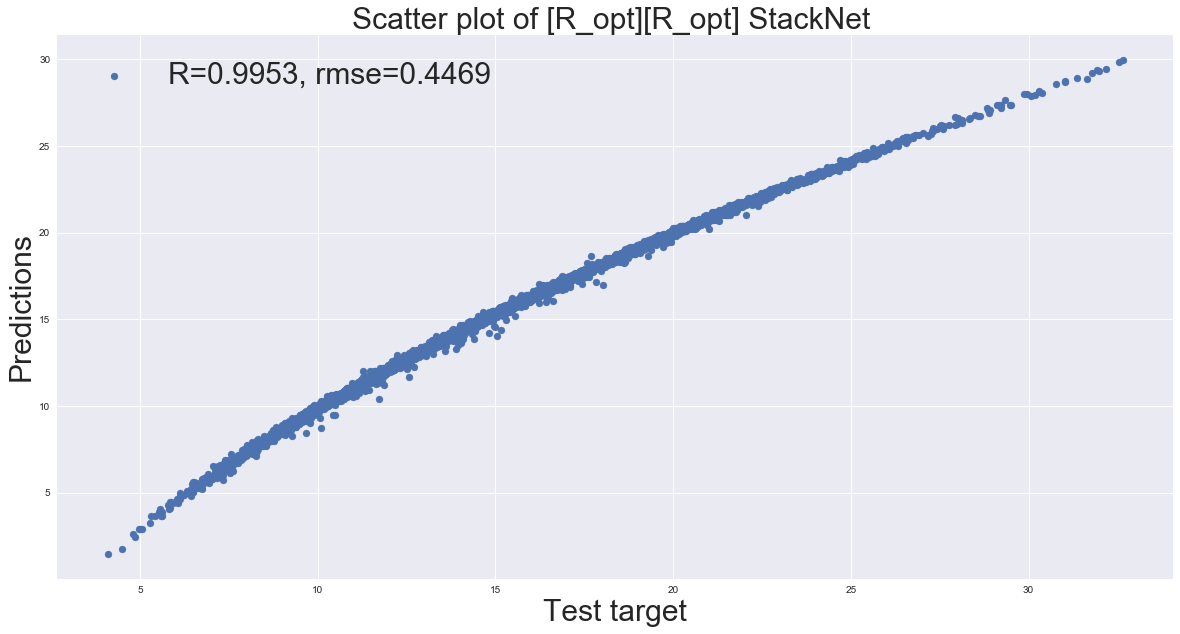

In [11]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    #1ST level #
    
    [Ridge(alpha=0.001, normalize=True, random_state=1234)],
    
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds1=model.predict(X_test)

#print ("rmse on test is %f " %(np.sqrt(mean_squared_error(y_test,preds1))))
#print ("correlation on test is %f " %(pearsonr(y_test.reshape(-1,1),preds1)[0]))


plt.scatter(y_test.reshape(-1,1), preds1,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds1)[0],np.sqrt(mean_squared_error(y_test,preds1)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30);
plt.xlabel("Test target", fontsize=30);
plt.title("Scatter plot of [R_opt][R_opt] StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds1)))
all_names.append("[R_opt][R_opt]")


plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()


====================== Start of Level 0 ======================
Input Dimensionality 10 at Level 0 
2 models included in Level 0 
Fold 1/4 , model 0 , rmse===0.428845 
Fold 1/4 , model 1 , rmse===0.787817 
=========== end of fold 1 in level 0 ===========
Fold 2/4 , model 0 , rmse===0.448941 
Fold 2/4 , model 1 , rmse===0.761795 
=========== end of fold 2 in level 0 ===========
Fold 3/4 , model 0 , rmse===0.465667 
Fold 3/4 , model 1 , rmse===0.800146 
=========== end of fold 3 in level 0 ===========
Fold 4/4 , model 0 , rmse===0.451505 
Fold 4/4 , model 1 , rmse===0.747920 
=========== end of fold 4 in level 0 ===========
Output dimensionality of level 0 is 2 
====================== End of Level 0 ======================
 level 0 lasted 1.764710 seconds 
====================== Start of Level 1 ======================
Input Dimensionality 2 at Level 1 
1 models included in Level 1 
Fold 1/4 , model 0 , rmse===0.383720 
=========== end of fold 1 in level 1 ===========
Fold 2/4 , model 0 , r

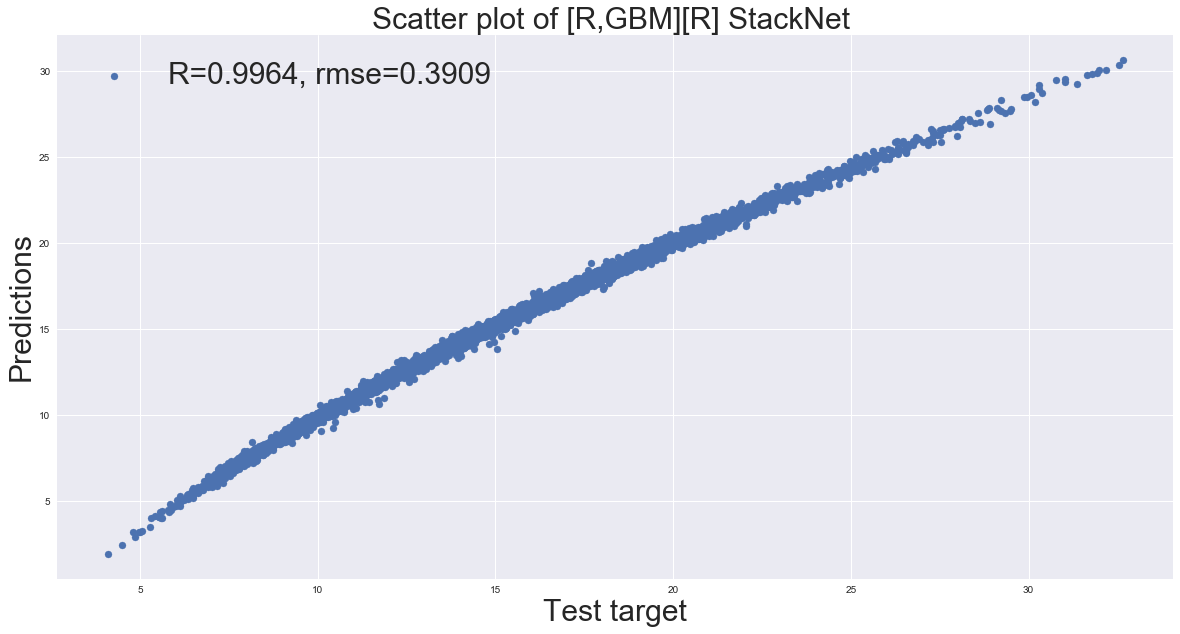

In [15]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=1

models=[
    #1ST level #
    
    [
        Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.06,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1)],    
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds2=model.predict(X_test)

#print ("rmse on test is %f " %(np.sqrt(mean_squared_error(y_test,preds2))))
#print ("correlation on test is %f " %(pearsonr(y_test.reshape(-1,1),preds2)[0]))


plt.scatter(y_test.reshape(-1,1), preds2,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds2)[0],np.sqrt(mean_squared_error(y_test,preds2)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30);
plt.xlabel("Test target", fontsize=30);
plt.title("Scatter plot of [R,GBM][R] StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds2)))
all_names.append(" [R,GBM][R]")

plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()


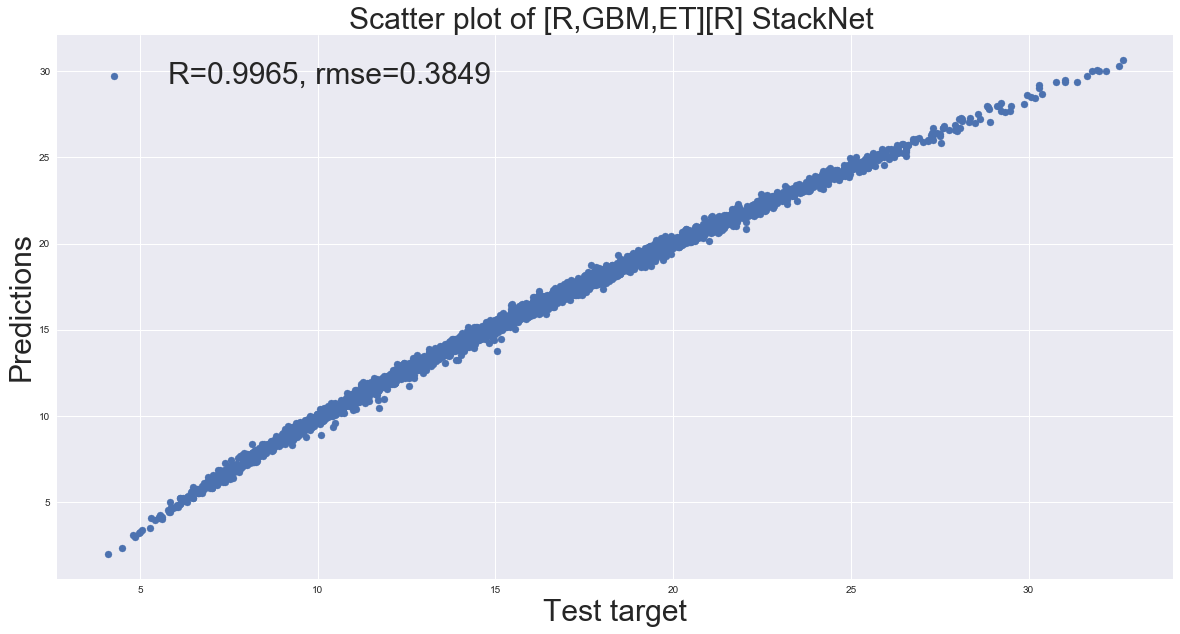

In [16]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    #1ST level #
    
    [
    Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 )],     
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds3=model.predict(X_test)

#print ("rmse on test is %f " %(np.sqrt(mean_squared_error(y_test,preds3))))
#print ("correlation on test is %f " %(pearsonr(y_test.reshape(-1,1),preds3)[0]))


plt.scatter(y_test.reshape(-1,1), preds3,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds3)[0],np.sqrt(mean_squared_error(y_test,preds3)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30);
plt.xlabel("Test target", fontsize=30);
plt.title("Scatter plot of [R,GBM,ET][R] StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds3)))
all_names.append("  [R,GBM,ET][R] ")

plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()

C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

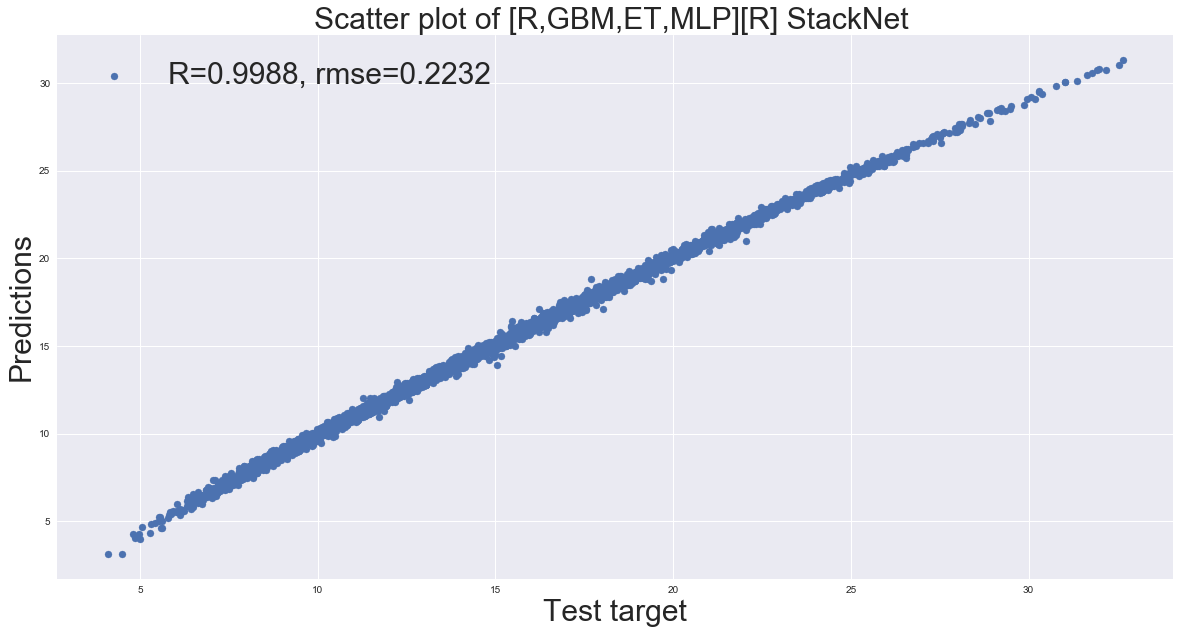

In [17]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    
    #1ST level #
    [Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ),
    MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,
                 batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,
                 max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,
                 beta_1=0.1, beta_2=0.1, epsilon=0.1)],
     
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds4=model.predict(X_test)

plt.scatter(y_test.reshape(-1,1), preds4,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds4)[0],np.sqrt(mean_squared_error(y_test,preds4)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30);
plt.xlabel("Test target", fontsize=30);
plt.title("Scatter plot of [R,GBM,ET,MLP][R] StackNet ", fontsize=30)
          
all_preds.append(np.sqrt(mean_squared_error(y_test,preds4)))
all_names.append(" [R,GBM,ET,MLP][R] ")          
          
          
plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

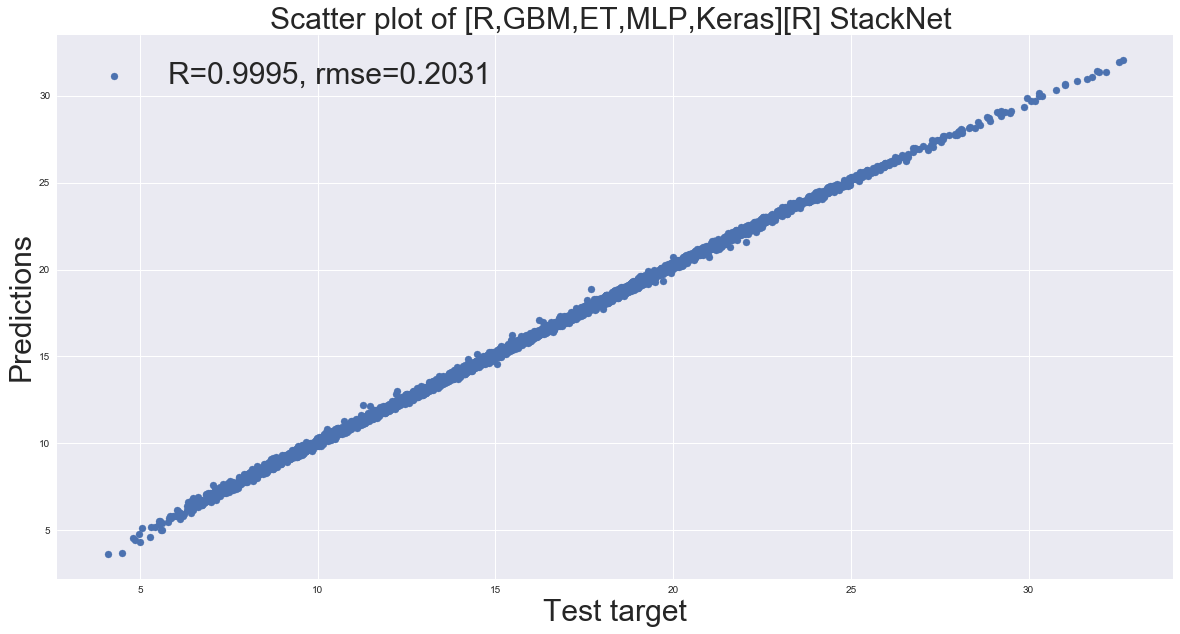

In [18]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor




# Read data
def keras_model():
    # Here's a Deep Dumb MLP (DDMLP)
    model = Sequential()
    model.add(Dense(128, input_dim=10))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(1))
    model.add(Activation('linear'))

    # we'll use categorical xent for the loss, and RMSprop as the optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    
    #1ST level #
    [Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ),
    MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,beta_1=0.1, beta_2=0.1, epsilon=0.1),
    KerasRegressor(build_fn=keras_model, epochs=10, batch_size=15, verbose=0),
    
    ],
     
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds5=model.predict(X_test)


plt.scatter(y_test.reshape(-1,1), preds5,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds5)[0],np.sqrt(mean_squared_error(y_test,preds5)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30)
plt.xlabel("Test target", fontsize=30)
plt.title("Scatter plot of [R,GBM,ET,MLP,Keras][R] StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds5)))
all_names.append(" [R,GBM,ET,MLP,Keras][R] ")  

plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()

C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

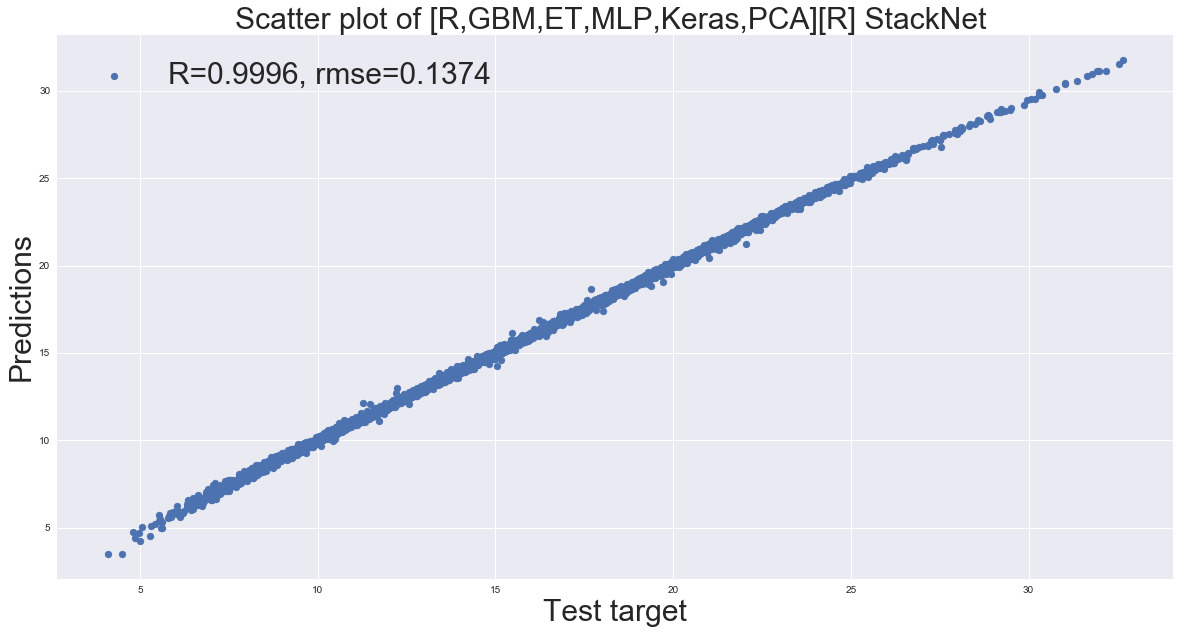

In [19]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition.pca import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor




# Read data
def keras_model():
    # Here's a Deep Dumb MLP (DDMLP)
    model = Sequential()
    model.add(Dense(128, input_dim=10))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(1))
    model.add(Activation('linear'))

    # we'll use categorical xent for the loss, and RMSprop as the optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    
    #1ST level #
    [Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ),
    MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,beta_1=0.1, beta_2=0.1, epsilon=0.1),
    KerasRegressor(build_fn=keras_model, epochs=10, batch_size=15, verbose=0),
    PCA(n_components=1, random_state=1)
    
    ],
     
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds6=model.predict(X_test)


plt.scatter(y_test.reshape(-1,1), preds6,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds6)[0],np.sqrt(mean_squared_error(y_test,preds6)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30)
plt.xlabel("Test target", fontsize=30)
plt.title("Scatter plot of [R,GBM,ET,MLP,Keras,PCA][R] StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds6)))
all_names.append(" [R,GBM,ET,MLP,Keras,PCA][R] ") 


plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()

C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

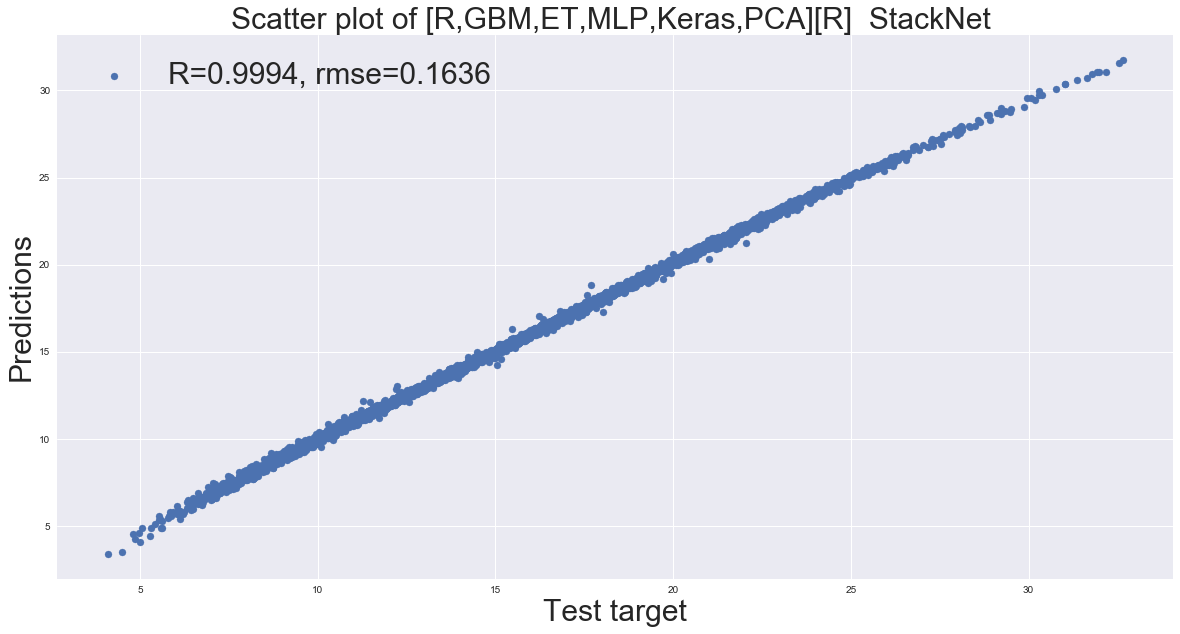

In [20]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition.pca import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor




# Read data
def keras_model():
    # Here's a Deep Dumb MLP (DDMLP)
    model = Sequential()
    model.add(Dense(128, input_dim=10))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(1))
    model.add(Activation('linear'))

    # we'll use categorical xent for the loss, and RMSprop as the optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=True
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    
    #1ST level #
    [Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ),
    MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,beta_1=0.1, beta_2=0.1, epsilon=0.1),
    KerasRegressor(build_fn=keras_model, epochs=10, batch_size=15, verbose=0),
    #PCA(n_components=1, random_state=1)
    
    ],
     
        #2ND level # 

        [ Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds7=model.predict(X_test)


plt.scatter(y_test.reshape(-1,1), preds7,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds7)[0],np.sqrt(mean_squared_error(y_test,preds7)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30)
plt.xlabel("Test target", fontsize=30)
plt.title("Scatter plot of [R,GBM,ET,MLP,Keras,PCA][R]  StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds7)))
all_names.append(" [R,GBM,ET,MLP,Keras,PCA][R] Restacking ") 

plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()

C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

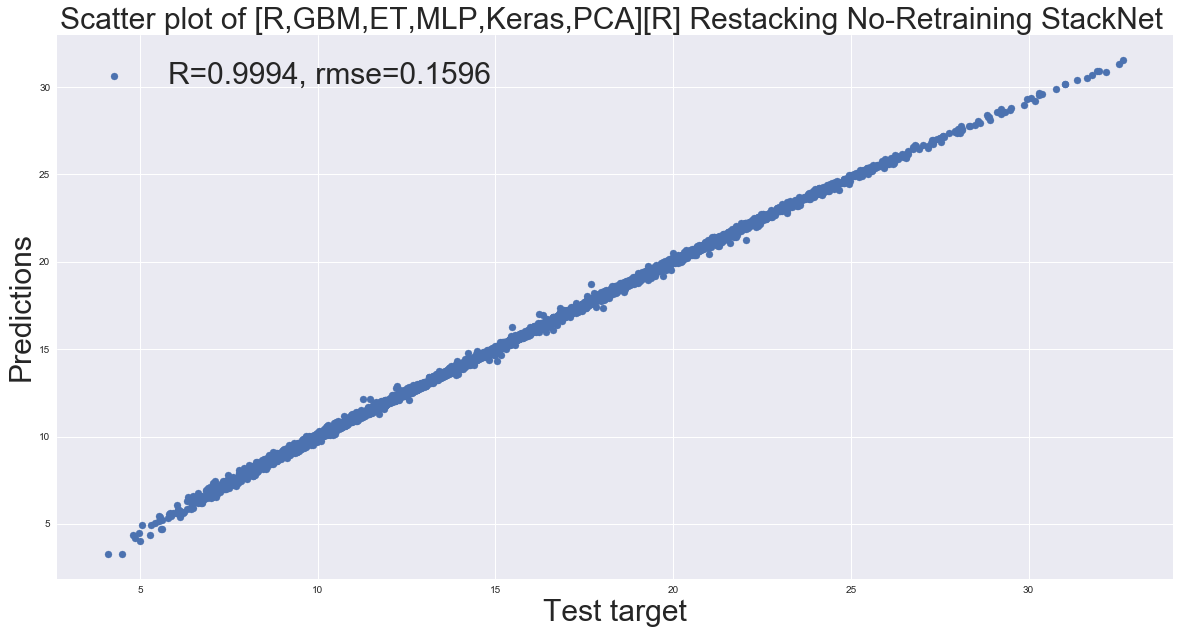

In [21]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition.pca import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor




# Read data
def keras_model():
    # Here's a Deep Dumb MLP (DDMLP)
    model = Sequential()
    model.add(Dense(128, input_dim=10))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(1))
    model.add(Activation('linear'))

    # we'll use categorical xent for the loss, and RMSprop as the optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=True
RETRAIN=False
SEED=12345
VERBOSE=0

models=[
    
    #1ST level #
    [Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ),
    MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,beta_1=0.1, beta_2=0.1, epsilon=0.1),
    KerasRegressor(build_fn=keras_model, epochs=10, batch_size=15, verbose=0),
    #PCA(n_components=1, random_state=1)
    
    ],
     
        #2ND level # 

        [ Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds8=model.predict(X_test)


plt.scatter(y_test.reshape(-1,1), preds8,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds8)[0],np.sqrt(mean_squared_error(y_test,preds8)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30)
plt.xlabel("Test target", fontsize=30)
plt.title("Scatter plot of [R,GBM,ET,MLP,Keras,PCA][R] Restacking No-Retraining StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds8)))
all_names.append(" [R,GBM,ET,MLP,Keras,PCA][R] Restacking No-Retraining") 


plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()

C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

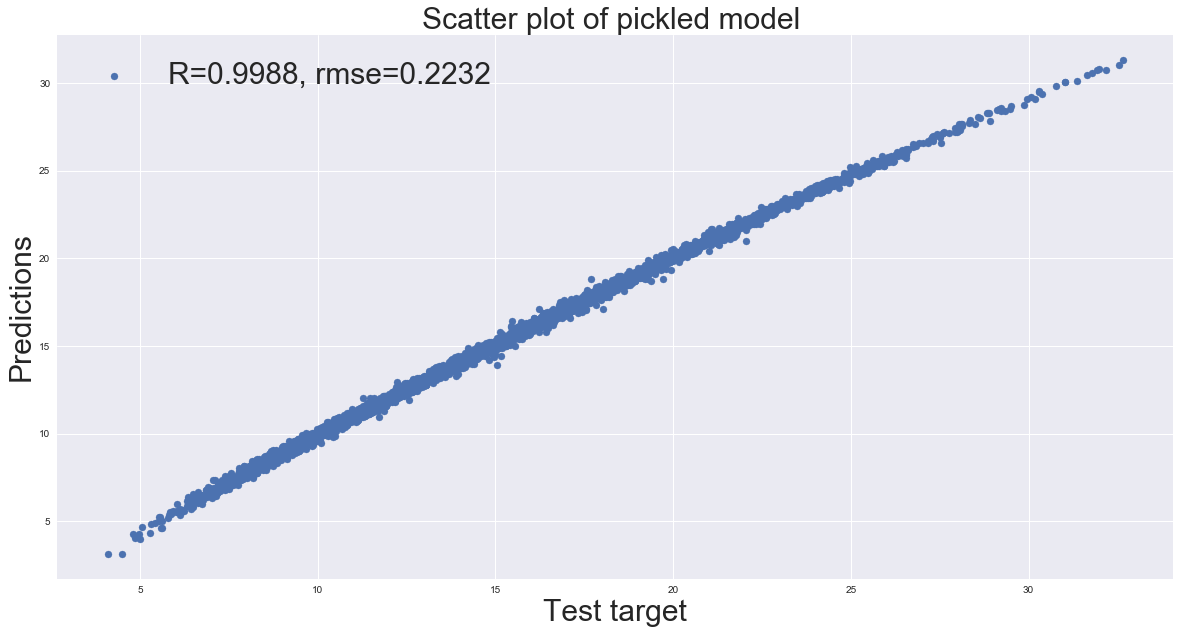

In [12]:
#export models
from sklearn.externals import joblib
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    
    #1ST level #
    [Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ),
    MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,
                 batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,
                 max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,
                 beta_1=0.1, beta_2=0.1, epsilon=0.1)],
     
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

joblib.dump((model), "mymodel.pkl")

model=joblib.load("mymodel.pkl")

pred=model.predict(X_test)


plt.scatter(y_test.reshape(-1,1), pred,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),pred)[0],np.sqrt(mean_squared_error(y_test,pred)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30)
plt.xlabel("Test target", fontsize=30)
plt.title("Scatter plot of pickled model ", fontsize=30)
plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()



In [22]:
#export oof and test predictions

from sklearn.externals import joblib
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from pystacknet.pystacknet import StackNetRegressor

#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=0

models=[
    
    #1ST level #
    [Ridge(alpha=0.001, normalize=True, random_state=1234),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1),    
    ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ),
    MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,
                 batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,
                 max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,
                 beta_1=0.1, beta_2=0.1, epsilon=0.1)],
     
        #2ND level # 

        [Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
all_oof_preds=model.fit_oof(X,y)
print ("levels of oof " , len(all_oof_preds))
print ("1st level shape  " , all_oof_preds[0].shape)
print ("2nd level shape  " , all_oof_preds[1].shape)

print ( "first 10 rows of 1st level predictions ")
print( all_oof_preds[0][:10])

print ( "first 10 rows of 2nd level predictions ")
print( all_oof_preds[1][:10])


test_pred=model.predict_up_to(X_test)

print ("levels of test predictions " , len(test_pred))
print ("1st level shape  " , test_pred[0].shape)
print ("2nd level shape  " , test_pred[1].shape)

print ( "first 10 rows of 1st level test predictions ")
print( test_pred[0][:10])

print ( "first 10 rows of 2nd level test predictions ")
print( test_pred[1][:10])




C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

levels of oof  2
1st level shape   (4999, 4)
2nd level shape   (4999, 1)
first 10 rows of 1st level predictions 
[[11.73312115 13.27490641 13.36034195 11.68794099]
 [10.04685506 10.81669056 11.83415277 10.10382585]
 [22.86414165 24.05822401 21.31558284 23.08956115]
 [13.8865295  14.06498889 13.26990506 13.63735579]
 [17.51773137 17.37738113 16.9877191  17.50239889]
 [19.39313789 19.36601861 19.30266164 19.60542476]
 [15.30518576 15.06773239 14.4239658  14.99237725]
 [16.31525469 15.6234919  16.31260021 16.09117784]
 [13.68511969 14.7806224  16.07478195 13.44684724]
 [ 9.03498573  9.94764644 10.99441609  9.0473319 ]]
first 10 rows of 2nd level predictions 
[[11.88628767]
 [10.14755639]
 [23.42902992]
 [13.65099488]
 [17.58027875]
 [19.74028214]
 [15.00251239]
 [16.0673105 ]
 [13.66108332]
 [ 9.09246234]]
(5000, 4)
(5000, 1)
levels of test predictions  2
1st level shape   (5000, 4)
2nd level shape   (5000, 1)
first 10 rows of 1st level test predictions 
[[ 9.84843975 10.88740537 11.30159

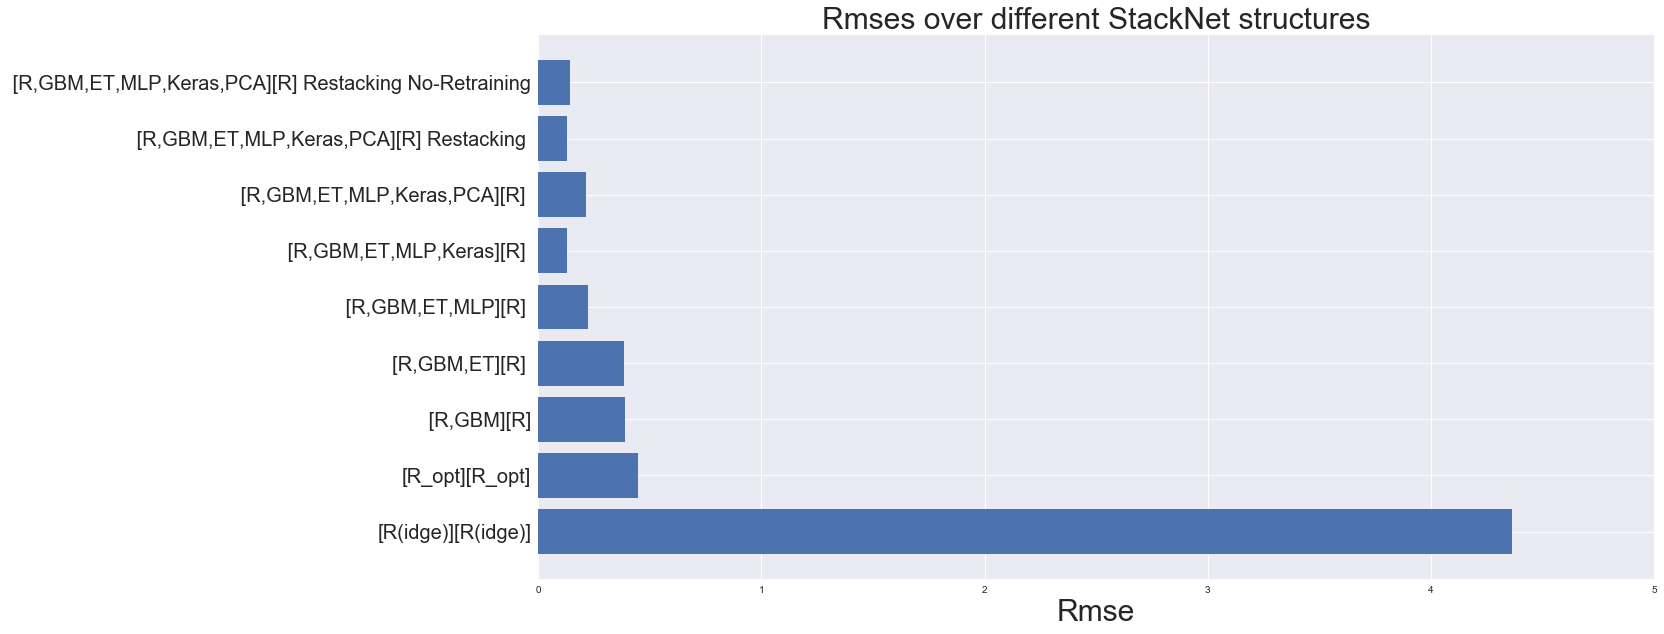

In [14]:
#plotting the different results

all_preds=np.array(all_preds)

#plt.plot(figsize=(2000,100))
#plt.show(block=False)
fig, ax = plt.subplots()

ind=np.arange(1,len(all_preds)+1)
plt.barh(ind, all_preds)

ax.set_yticks(ind)
ax.set_yticklabels(all_names, fontsize=20)

ax.set_xlim([0, 5])
ax.set_xlabel('Rmse', fontsize=30)
ax.set_title('Rmses over different StackNet structures', fontsize=30)

#fig.canvas.flush_events()

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
#plt.ylabel("RMSE", fontsize=30)
#plt.xlabel("Model name", fontsize=30)
#plt.subplots()[1].set_xticklabels(all_names)
#plt.title("Rmses over different StackNet structures ", fontsize=30)
#plt.legend( loc = 'upper left', prop={'size': 30})
#plt.show()



====================== Start of Level 0 ======================
Input Dimensionality 10 at Level 0 
6 models included in Level 0 


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 1/4 , model 0 , rmse===0.428845 
Fold 1/4 , model 1 , rmse===1.398365 
Fold 1/4 , model 2 , rmse===1.446256 
Fold 1/4 , model 3 , rmse===0.247155 
Fold 1/4 , model 4 , rmse===0.219608 
Fold 1/4 , model 5 , rmse===0.428924 
=========== end of fold 1 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 2/4 , model 0 , rmse===0.448941 
Fold 2/4 , model 1 , rmse===2.854982 
Fold 2/4 , model 2 , rmse===1.383854 
Fold 2/4 , model 3 , rmse===0.245070 
Fold 2/4 , model 4 , rmse===0.186362 
Fold 2/4 , model 5 , rmse===0.448593 
=========== end of fold 2 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 3/4 , model 0 , rmse===0.465667 
Fold 3/4 , model 1 , rmse===2.295900 
Fold 3/4 , model 2 , rmse===1.475647 
Fold 3/4 , model 3 , rmse===0.269993 
Fold 3/4 , model 4 , rmse===0.229976 
Fold 3/4 , model 5 , rmse===0.466005 
=========== end of fold 3 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 4/4 , model 0 , rmse===0.451505 
Fold 4/4 , model 1 , rmse===1.716726 
Fold 4/4 , model 2 , rmse===1.404690 
Fold 4/4 , model 3 , rmse===0.245913 
Fold 4/4 , model 4 , rmse===0.222462 
Fold 4/4 , model 5 , rmse===0.451363 
=========== end of fold 4 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Output dimensionality of level 0 is 6 
====================== End of Level 0 ======================
 level 0 lasted 45.828530 seconds 
====================== Start of Level 1 ======================
Input Dimensionality 6 at Level 1 
1 models included in Level 1 
Fold 1/4 , model 0 , rmse===0.197477 
=========== end of fold 1 in level 1 ===========
Fold 2/4 , model 0 , rmse===0.182491 
=========== end of fold 2 in level 1 ===========
Fold 3/4 , model 0 , rmse===0.207783 
=========== end of fold 3 in level 1 ===========
Fold 4/4 , model 0 , rmse===0.202346 
=========== end of fold 4 in level 1 ===========
Output dimensionality of level 1 is 1 
====================== End of Level 1 ======================
 level 1 lasted 0.010003 seconds 
====================== End of fit ======================
 fit() lasted 45.838533 seconds 
====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 est

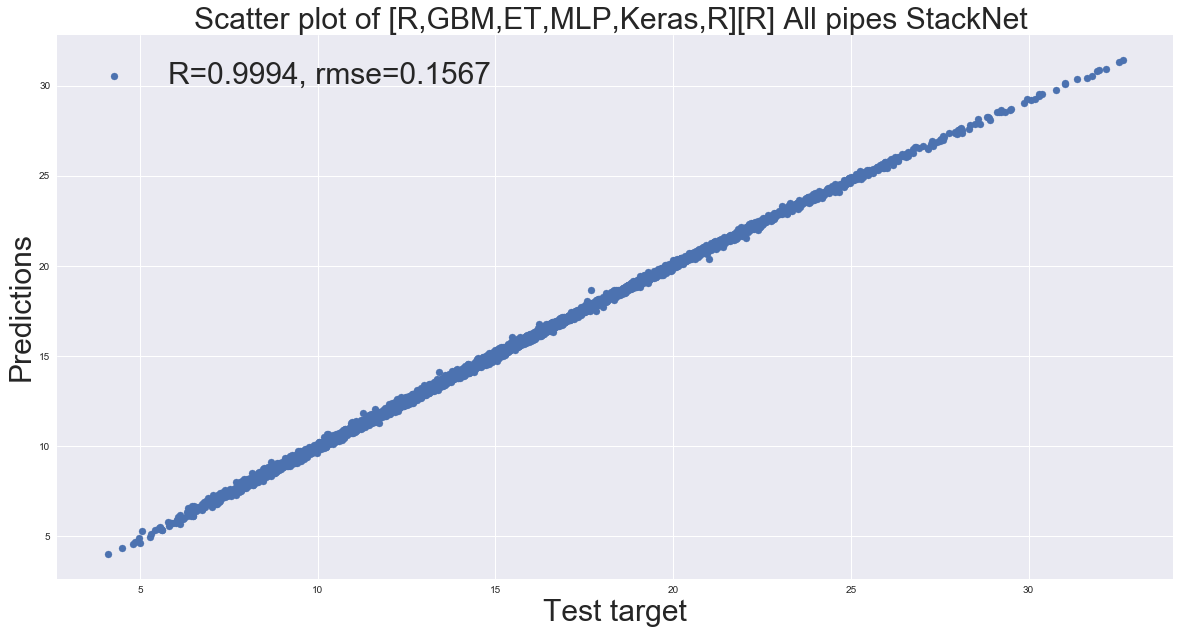

In [29]:
### Use Pipelines

from sklearn.pipeline import Pipeline
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition.pca import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectPercentile, f_regression




# Read data
def keras_model():
    # Here's a Deep Dumb MLP (DDMLP)
    model = Sequential()
    model.add(Dense(128, input_dim=10))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(1))
    model.add(Activation('linear'))

    # we'll use categorical xent for the loss, and RMSprop as the optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=1

models=[
    
    #1ST level #
    [Pipeline([('std',MinMaxScaler()),('Ridge',Ridge(alpha=0.001, normalize=True, random_state=1234))]) ,
    Pipeline([('pca',PCA(n_components=10, random_state=1)),('GB',GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1))]), 
    Pipeline([('fref',SelectPercentile(score_func=f_regression, percentile=99)),('ET', ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ))]),
    Pipeline([('std',StandardScaler()),('mlp',MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,beta_1=0.1, beta_2=0.1, epsilon=0.1))]),
    Pipeline([('std',StandardScaler()),('keras', KerasRegressor(build_fn=keras_model, epochs=10, batch_size=15, verbose=0))]),
    Pipeline([('std',StandardScaler()),('Ridge',Ridge())])
    #PCA(n_components=1, random_state=1)
    
    ],
     
        #2ND level # 

        [ Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds9=model.predict(X_test)


plt.scatter(y_test.reshape(-1,1), preds9,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds9)[0],np.sqrt(mean_squared_error(y_test,preds9)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30)
plt.xlabel("Test target", fontsize=30)
plt.title("Scatter plot of [R,GBM,ET,MLP,Keras,R][R] All pipes StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds9)))
all_names.append("Scatter plot of [R,GBM,ET,MLP,Keras,R][R] All pipes StackNet ") 


plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()

====================== Start of Level 0 ======================
Input Dimensionality 10 at Level 0 
6 models included in Level 0 


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 1/4 , model 0 , rmse===0.428959 
Fold 1/4 , model 1 , rmse===0.646961 
Fold 1/4 , model 2 , rmse===1.446256 
Fold 1/4 , model 3 , rmse===0.247155 
Fold 1/4 , model 4 , rmse===0.237194 
Fold 1/4 , model 5 , rmse===0.428924 
=========== end of fold 1 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 2/4 , model 0 , rmse===0.448474 
Fold 2/4 , model 1 , rmse===0.775299 
Fold 2/4 , model 2 , rmse===1.383854 
Fold 2/4 , model 3 , rmse===0.245070 
Fold 2/4 , model 4 , rmse===0.250680 
Fold 2/4 , model 5 , rmse===0.448593 
=========== end of fold 2 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 3/4 , model 0 , rmse===0.466133 
Fold 3/4 , model 1 , rmse===0.770484 
Fold 3/4 , model 2 , rmse===1.475647 
Fold 3/4 , model 3 , rmse===0.269993 
Fold 3/4 , model 4 , rmse===0.211689 
Fold 3/4 , model 5 , rmse===0.466005 
=========== end of fold 3 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 4/4 , model 0 , rmse===0.451317 
Fold 4/4 , model 1 , rmse===0.769216 
Fold 4/4 , model 2 , rmse===1.404690 
Fold 4/4 , model 3 , rmse===0.245913 
Fold 4/4 , model 4 , rmse===0.260770 
Fold 4/4 , model 5 , rmse===0.451363 
=========== end of fold 4 in level 0 ===========


C:\Users\mimar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Output dimensionality of level 0 is 6 
====================== End of Level 0 ======================
 level 0 lasted 49.187016 seconds 
====================== Start of Level 1 ======================
Input Dimensionality 6 at Level 1 
1 models included in Level 1 
Fold 1/4 , model 0 , rmse===0.203831 
=========== end of fold 1 in level 1 ===========
Fold 2/4 , model 0 , rmse===0.209815 
=========== end of fold 2 in level 1 ===========
Fold 3/4 , model 0 , rmse===0.198536 
=========== end of fold 3 in level 1 ===========
Fold 4/4 , model 0 , rmse===0.206079 
=========== end of fold 4 in level 1 ===========
Output dimensionality of level 1 is 1 
====================== End of Level 1 ======================
 level 1 lasted 0.014001 seconds 
====================== End of fit ======================
 fit() lasted 49.201017 seconds 
====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 est

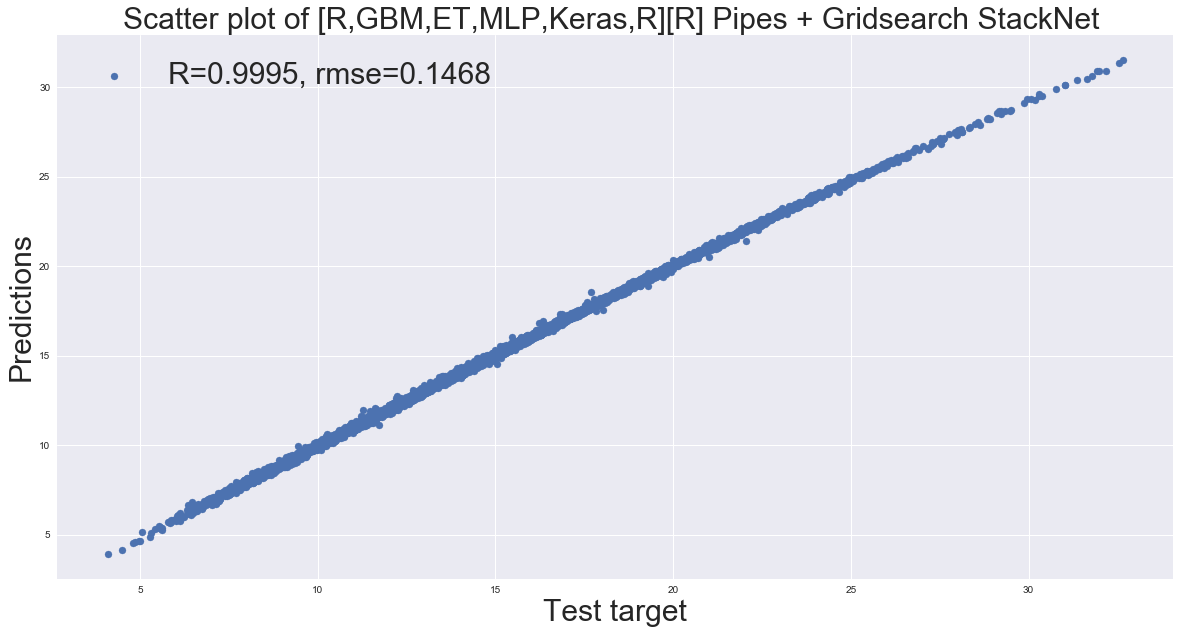

In [31]:
### Use Pipelineds an GRIDSEARCH

from sklearn.pipeline import Pipeline
from pystacknet.pystacknet import StackNetRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition.pca import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import GridSearchCV



# Read data
def keras_model():
    # Here's a Deep Dumb MLP (DDMLP)
    model = Sequential()
    model.add(Dense(128, input_dim=10))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(1))
    model.add(Activation('linear'))

    # we'll use categorical xent for the loss, and RMSprop as the optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


#PARAMETERS

FOLDS=4
METRIC="rmse"
RESTACKING=False
RETRAIN=True
SEED=12345
VERBOSE=1

models=[
    
    #1ST level #
    [Pipeline([('std',MinMaxScaler()), ('Ridge',GridSearchCV(Ridge(alpha=0.001, normalize=True, random_state=1234),  {'alpha':(0.001, 1.), 'normalize':[True, False]}, cv=5) )]) ,
    Pipeline([('pca',PCA(n_components=10, random_state=1)),('GB',GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_features=0.2,min_samples_leaf=20,max_depth=6,random_state=1))]), 
    Pipeline([('fref',SelectPercentile(score_func=f_regression, percentile=99)),('ET', ExtraTreesRegressor(n_estimators=200, max_features=0.5, max_depth=15, random_state=1234 ))]),
    Pipeline([('std',StandardScaler()),('mlp',MLPRegressor(hidden_layer_sizes=(100,50 ), activation="relu", solver="adam",alpha=0.01,batch_size=30, learning_rate="adaptive",learning_rate_init=0.001, power_t=0.5,max_iter=20, shuffle=True, random_state=1, tol=0.0001, momentum=0.9,validation_fraction=0.1,beta_1=0.1, beta_2=0.1, epsilon=0.1))]),
    Pipeline([('std',StandardScaler()),('keras', KerasRegressor(build_fn=keras_model, epochs=10, batch_size=15, verbose=0))]),
    Pipeline([('std',StandardScaler()),('Ridge',Ridge())])
    #PCA(n_components=1, random_state=1)
    
    ],
    
        #2ND level # 

        [ Ridge(alpha=0.001, normalize=True, random_state=1234)],    

]

#MODEL STATEMENT
model=StackNetRegressor(models, metric=METRIC, folds=FOLDS,
    restacking=RESTACKING, use_retraining=RETRAIN, 
    random_state=SEED, verbose=VERBOSE)

#MODEL FIT
model.fit(X,y)

#MODEL PREDICT
preds10=model.predict(X_test)


plt.scatter(y_test.reshape(-1,1), preds10,  label=("R=%.4f, rmse=%.4f"%(pearsonr(y_test.reshape(-1,1),preds10)[0],np.sqrt(mean_squared_error(y_test,preds10)))))

#lt.hist([y,y_test], normed=True, label=["train", "test"], bins=30, color=["green","red"] )
plt.ylabel("Predictions", fontsize=30)
plt.xlabel("Test target", fontsize=30)
plt.title("Scatter plot of [R,GBM,ET,MLP,Keras,R][R] Pipes + Gridsearch StackNet ", fontsize=30)

all_preds.append(np.sqrt(mean_squared_error(y_test,preds10)))
all_names.append("Scatter plot of [R,GBM,ET,MLP,Keras,Pipe][R] Pipes + Gridsearch  StackNet ") 


plt.legend( loc = 'upper left', prop={'size': 30})
plt.show()


